In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
train_data = np.loadtxt('./data/lab_1_train.csv', delimiter=',', skiprows=1)
x_train_values = train_data[:, 1]
y_train_values = train_data[:, 2]

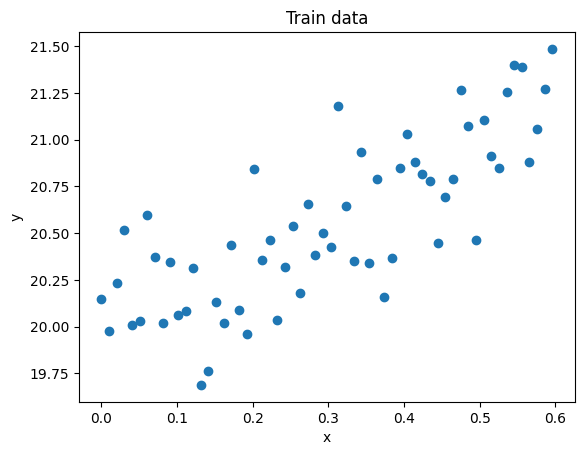

In [59]:
plt.scatter(x_train_values, y_train_values, marker='o')
plt.title('Train data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [60]:
def initialize_parameters():
    w = np.random.randn()
    b = np.random.randn()
    return w, b

In [61]:
def calculate_y_pred(w, b, x_values):
    return w * x_values + b

In [62]:
def calculate_loss(y_pred, y_values):
    return np.mean((y_pred - y_values) ** 2)

In [63]:
def update_parameters(w, b, epoch, learning_rate, x_values, y_values):
    y_pred = calculate_y_pred(w, b, x_values)
    loss = calculate_loss(y_pred, y_values)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, w: {w}, b: {b}, Loss: {loss}")

    dw = 2 * np.mean(x_values * (y_pred - y_values))
    db = 2 * np.mean(y_pred - y_values)

    w -= learning_rate * dw
    b -= learning_rate * db

    return w, b

In [95]:
def linear_gradient(x_values, y_values):
    w, b = initialize_parameters()
    epochs = 1000
    linear_gradient = 0.05
    for epoch in range(epochs):
        w, b = update_parameters(w, b, epoch, linear_gradient, x_values, y_values)
    
    return w, b

In [96]:
w, b = linear_gradient(x_train_values, y_train_values)
w, b

Epoch 0, w: 1.4487182050345175, b: -0.6869562541589187, Loss: 432.9226128671645
Epoch 10, w: 5.297363839470713, b: 12.390488154814664, Loss: 43.713908965234246
Epoch 20, w: 6.412642036831539, b: 16.537636806571832, Loss: 5.089188677954741
Epoch 30, w: 6.669964603304013, b: 17.87217461681922, Loss: 1.2223939401382098
Epoch 40, w: 6.659749450229198, b: 18.320337671431552, Loss: 0.8034432209741464
Epoch 50, w: 6.567823542066991, b: 18.488642444635225, Loss: 0.7282450869392555
Epoch 60, w: 6.452626386912792, b: 18.56807807042927, Loss: 0.6889638694989355
Epoch 70, w: 6.332490233028751, b: 18.618800209733518, Loss: 0.6549813526765298
Epoch 80, w: 6.213121045514834, b: 18.659769737429023, Loss: 0.6231672347730075
Epoch 90, w: 6.096251110587085, b: 18.69697638262013, Loss: 0.5931214591083954
Epoch 100, w: 5.9823633426402525, b: 18.732325235542486, Loss: 0.5647195365991167
Epoch 110, w: 5.871549009894134, b: 18.76643476697748, Loss: 0.5378689294769299
Epoch 120, w: 5.763777749844809, b: 18.799

(2.2986470922048703, 19.86186321920804)

In [97]:
train_data = np.loadtxt('./data/lab_1_test.csv', delimiter=',', skiprows=1, usecols=(1, 2))
x_test_values = train_data[:, 0]
y_test_values = train_data[:, 1]

In [98]:
test_y_pred = calculate_y_pred(w, b, x_test_values)
test_loss = calculate_loss(test_y_pred, y_test_values)
test_loss

0.08764266215245484

In [99]:
x_test_np_values = np.array(x_test_values)
x_train_np_values = np.array(x_train_values)
x_combined_np_values = np.concatenate((x_train_np_values, x_test_np_values))

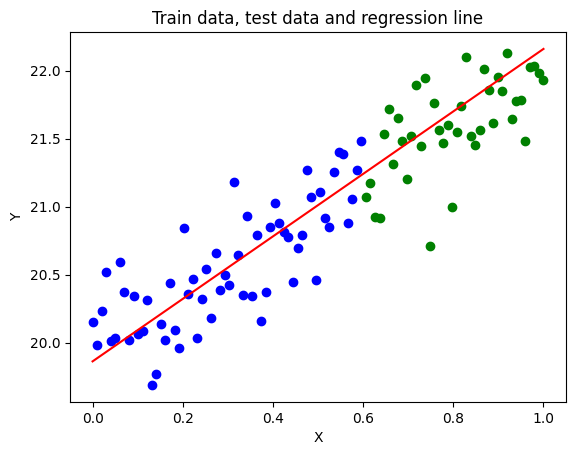

In [100]:
plt.scatter(x_train_values, y_train_values, color='blue', label='Train data')
plt.scatter(x_test_values, y_test_values, color='green', label='Test data')
plt.plot(x_combined_np_values, w * x_combined_np_values + b, color='red', label='Regression line')
plt.title('Train data, test data and regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()